| **Chapter**                   | 5:  Multi-pathogen dynamics                           |
| ----------------------------- | ----------------------------------------------------- |
| **Computational Note**        | 5.x: Complete cross-immunity                          |
| **Package prerequisites**     | None                                                  |


# Complete cross-immunity

## Two-pathogen cross-immunity

The two-pathogen model is governed by the following system of ODEs:

\begin{equation}
        \frac{dS}{dt} =    - \beta_a S I_a - \beta_b S I_b + \nu
\end{equation}

\begin{equation}
        \frac{dI_a}{dt} =    \beta_a S I_a - \gamma_a I_a - \mu I_a
\end{equation}

\begin{equation}
        \frac{dI_b}{dt} =    \beta_b S I_b - \gamma_b I_b - \mu I_b
\end{equation}

\begin{equation}
        \frac{dR}{dt} =    \gamma_a I_a + \gamma_b I_b - \mu R
\end{equation}

We assume a constant population with a turnover rate of $\mu = \nu = 10^{-4}$ persons per day and the following pathogenic parameters:

|  | $\beta$      | $\gamma$       | $\mathfrak{R}_0$ |
|----------|-----------|-----------|----|
| $a$  | 1.5 | 1 | 1.5 |
| $b$  | 0.4 | 0.2 | 2 |

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In [2]:
def deriv(t, y, beta, gamma, mu, nu):

    S = y[0]
    I = y[1:].T.flatten()

    dSdt  = - (beta * S).dot(I) + nu
    dIdt = beta * S * I - gamma * I - mu * I

    return dSdt, *dIdt

In [3]:
I_0 = np.array([1e-6, 1e-6])
S_0 = 1 - I_0.sum()

y_0 = np.array([S_0, *I_0])

beta = np.array([1.5, 0.4])
gamma = np.array([1.0, 0.2])

mu, nu = 1e-4, 1e-4

In [4]:
res = solve_ivp(fun=deriv, t_span = (0, 100), y0=y_0, args=(beta, gamma, mu, nu), max_step=1)

/var/folders/1d/97x3559931s0_6hkz64q4zth0000gn/T/ipykernel_85101/4230098862.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


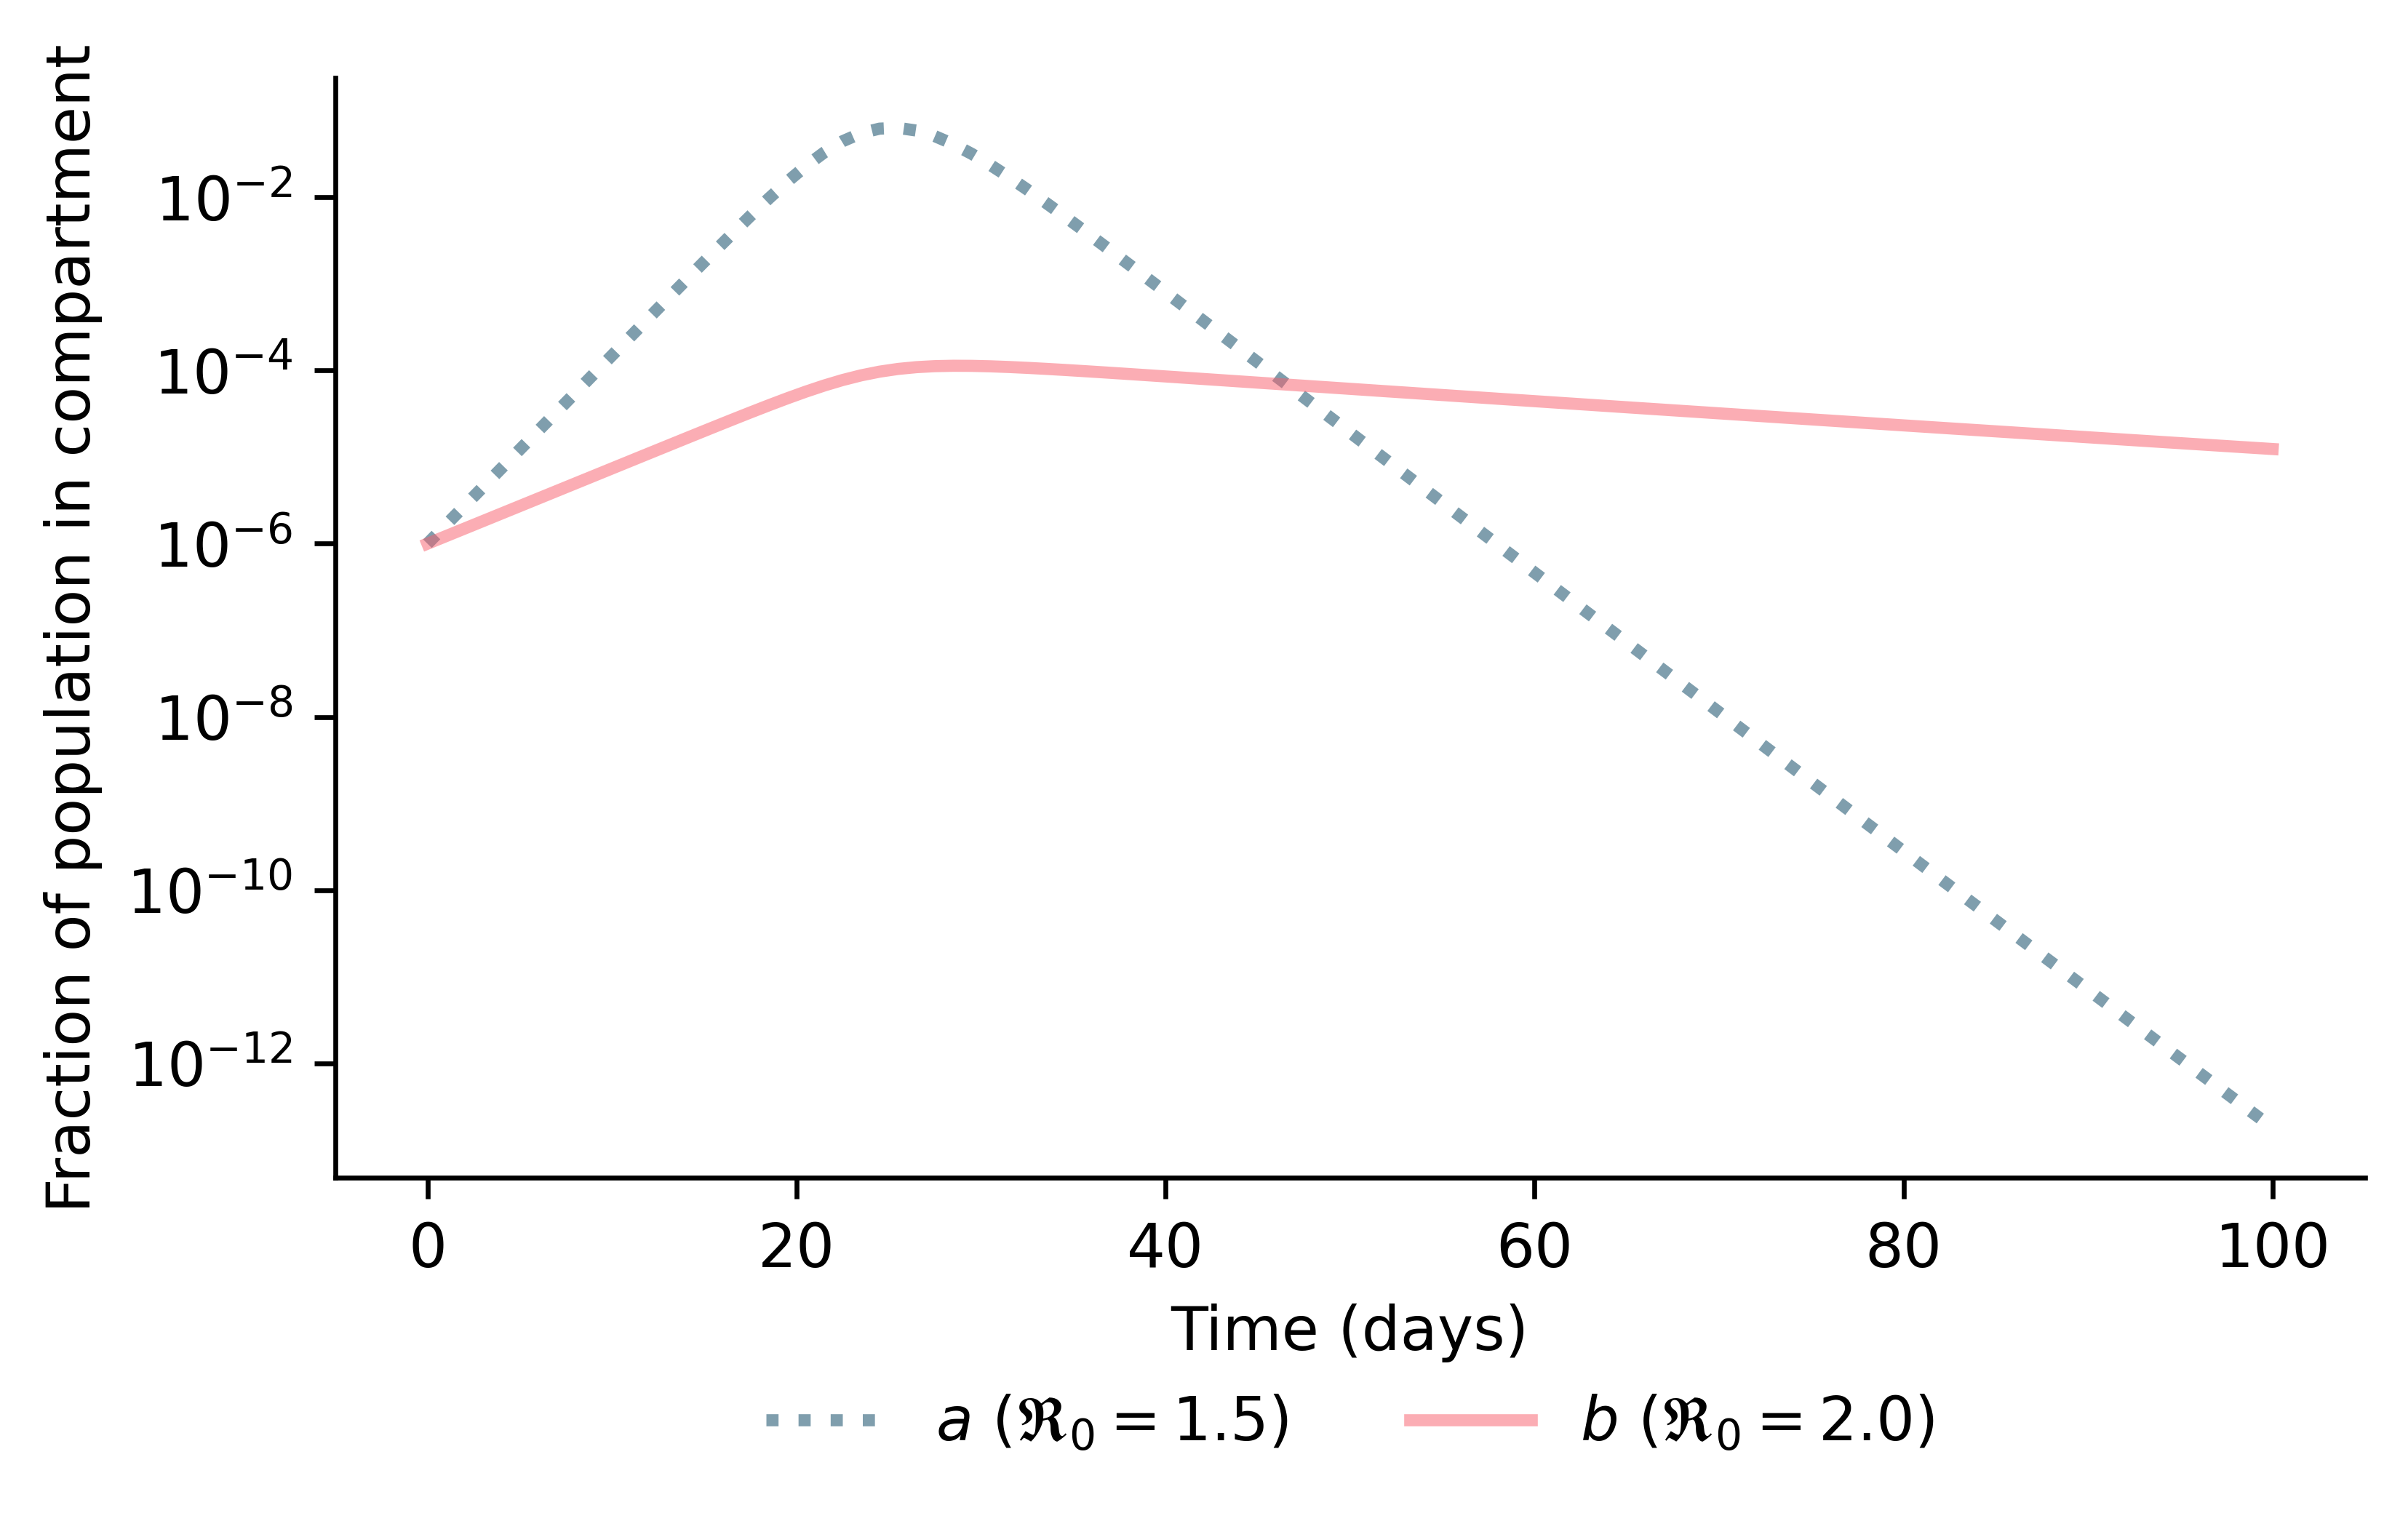

In [6]:
_, Ia, Ib = res.y

fig = plt.figure(facecolor="w", figsize=(6, 4), dpi=600)
ax = fig.add_subplot(111, axisbelow=True)

ax.plot(res.t, Ia, color=COLORS["D"], alpha=0.5, lw=2, linestyle=":", label="$a$ ($\mathfrak{R}_0 = 1.5$)")
ax.plot(res.t, Ib, color=COLORS["I"], alpha=0.5, lw=2, label="$b$ ($\mathfrak{R}_0 = 2.0$)")


# ax.fill_between(res.t, 0, S, color=COLORS["S"], alpha=0.15)
# ax.fill_between(res.t, 0, I, color=COLORS["I"], alpha=0.15)
# ax.fill_between(res.t, D, R + D, color=COLORS["R"], alpha=0.15, label="Recovered")
# ax.fill_between(res.t, 0, D, color=COLORS["D"], alpha=0.15, label="Deceased")

ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of population in compartment")
# ax.set_ylim(0, 1.0)
ax.set_yscale("log")
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.3), loc="lower center", ncol=2, frameon=False)

fig.subplots_adjust(bottom=0.25)

plt.savefig("complete_cross_immunity.pdf")
plt.show()